<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_008_Fowles_CP2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

# Fowles, AM Chapter 2
Computer Problem C2.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [ ]:
m = 70 # [kg]
g = 9.8 # [m/s^2]
c2 = 0.5
x0 = 32000 # [m] initial height
R = 6.37e6 # [m] radius of Earth
H = 8000 # [m] 특성 고도

### (a) 중력 가속도가 일정하고 공기 저항이 없는 경우

$$ x(t) = h - \frac{1}{2}gt^2$$

$$ x_0 = x(0) = h$$

$$ x(t_a) = 0$$

$$ 0 = x_0 - \frac{1}{2}g t_a^2$$

$$ t_a  = \sqrt\frac{2 x_0}{g}$$

In [ ]:
ta = np.sqrt(2 * x0 / g)
print(f"{ta:.0f} s")

81 s


### (b) 중력 가속도가 일정하고 제곱형 저항이 있는 경우

$$m\frac{dv}{dt} = -mg - c_2 v\left|v\right|$$

낙하시 $v \le 0$이므로,
$$\frac{dv}{dt} = -g + \frac{c_2}{m} v^2 = -g\left(1-\frac{v^2}{v_t^2}\right), \left(v_t=\sqrt{\frac{mg}{c_2}}\right),$$

$$ dt = -\frac{v_t du}{g\left(1-u^2\right)} = -\tau\frac{du}{1 - u^2},\space \left(u=\dfrac{v}{v_t},\space\tau=\dfrac{v_t}{g}\right)$$

$$ u = \frac{v}{v_t} = -\tanh\frac{t}{\tau}$$

In [ ]:
vt, tau, t = sym.symbols(r"v_t \tau t")

속도 공식을 적분하여 x(t)를 구한다:

$$v(t) = -v_t \tanh\left(\frac{t}{\tau}\right)$$
$$x(t) - x_0= \int_{0}^{t} v(t)dt$$


In [ ]:
xt = sym.integrate(-vt * sym.tanh(t/tau), (t, 0, t)) + x0
xt

-v_t*(-\tau*log(tanh(t/\tau) + 1) + t) + 32000

특성시간 tau의 값

In [ ]:
TAU = np.sqrt(m/(g*c2))
TAU

3.779644730092272

종단 속력

In [ ]:
VT = np.sqrt(m*g/c2)
print(f"vt = {VT:.0f} m/s")

vt = 37 m/s


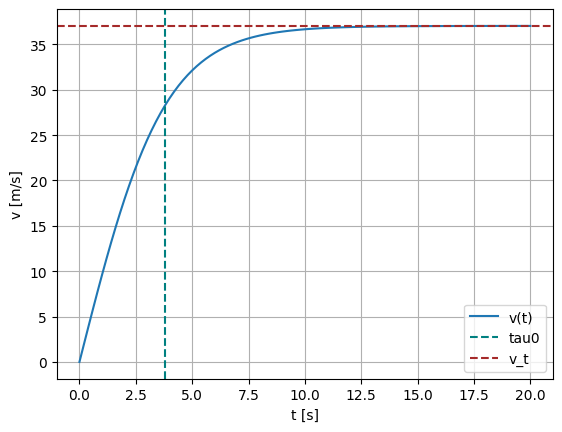

In [ ]:
# 속력-시간 그래프
ts = np.linspace(0, 20, 101)
plt.plot(ts, VT*np.tanh(ts/TAU), label="v(t)")
plt.axvline(TAU, c="teal", ls="dashed", label="tau0")
plt.axhline(VT, c="brown", ls="dashed", label="v_t")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.legend()
plt.show()

In [ ]:
"""
x(t)의 sympy 기호 식을 바탕으로
인자를 받아 값을 반환하는 함수를 생성한다.
"""
xf = sym.lambdify([t], xt.subs({vt:VT, tau:TAU}))

In [ ]:
from scipy.optimize import fsolve

대부분의 낙하시간 동안 종단 속력에 가까운 속력으로 낙하한다고 가정하면 낙하시간은 대략

$$ \frac{x_0}{v_t}  = \frac{32000\ \rm m}{37\ \rm m/s} \approx 864\ {\rm s}$$

일 것이므로 800~900 s 사이에서 낙하시간을 찾는다:

In [ ]:
x0/VT

863.9187954496622

In [ ]:
# xt_x0(t) = 0, 즉 xf(t) = 0 인 t를 구한다:
tb = fsolve(xf, [800.0, 900.0])
tb

array([866.53864554, 866.53864554])

In [ ]:
# 32000를 낙하하는 데 걸리는 시간:
print(f"time of fall = {tb[0]:.0f} s")

time of fall = 867 s


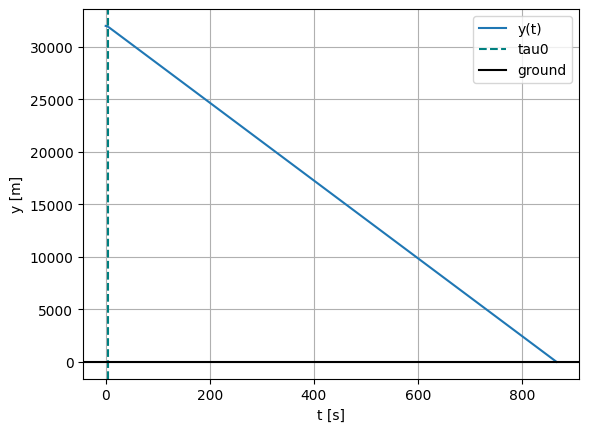

In [ ]:
ts = np.linspace(0, tb[0], 500)

plt.plot(ts, xf(ts), label="y(t)")

plt.axvline(TAU, c="teal", ls="dashed", label="tau0")
plt.axhline(0, c="k", label="ground")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("y [m]")
plt.legend()

### (c) 뉴턴 중력 법칙에 따라 높이에 따라 중력 가속도가 변하고, 높이에 따른 공기의 밀도 변화를 반영한 제곱형 저항이 작용하는 경우 :

중력:

$$ g(x) = -\frac{g}{(1+x/R)^2}$$

공기 저항에 의한 가속도(낙하시):

$$ d(x,v) = +\frac{c_2}{m} e^{-x/H} v^2$$

In [ ]:
def f(t, S):
  """
  물체의 운동 상태를 입력받아 상태의 변화율을 반환하는 함수
  """
  x, v = S
  gx = -g / (1 + x/R)**2
  dxv = c2/m * np.exp(-x/H) * v**2
  return (v, gx + dxv)

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
"""
수치적 해석으로 낙하 운동을 모사한다.
"""
sol = solve_ivp(f, (0, 900.0), [x0, 0], method = "RK45", t_eval=np.linspace(0,900,9001), max_step=0.1)

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  8.999e+02  9.000e+02]
        y: [[ 3.200e+04  3.200e+04 ... -1.265e+04 -1.265e+04]
            [ 0.000e+00 -9.702e-01 ... -1.685e+01 -1.685e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 54020
     njev: 0
      nlu: 0

In [ ]:
sol.y[0][-1]

-12650.265637831018

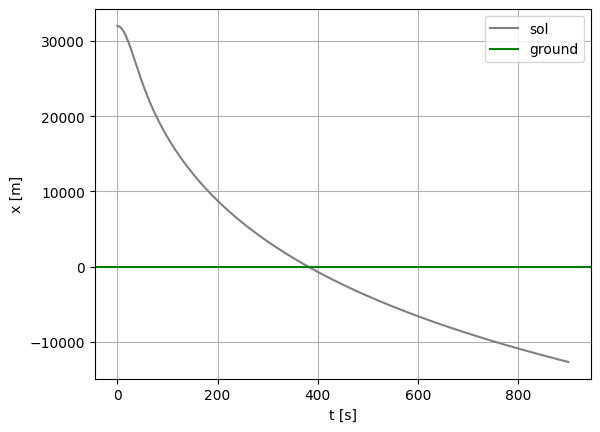

In [ ]:
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(sol.t, sol.y[0], c="gray", label="sol")
plt.axhline(0, c="green", label="ground")
plt.legend()

In [ ]:
"""
sol.y[0], 즉  x 값이 양에서 음으로 바뀌기 직전 지점의 인덱스를 구한다
"""
ids,  = np.where(np.diff(np.sign(sol.y[0])) != 0)
ids

array([3811])

In [ ]:
idx = ids[0]
idx

3811

In [ ]:
"""
idx 전후에서 sol.y[0], 즉 x값이 어떻게 변하는지 확인해 본다
"""
sol.y[0, idx-5:idx+5]

array([ 21.98220697,  18.25702517,  14.53271609,  10.80927932,
         7.08671445,   3.36502107,  -0.35580124,  -4.07575289,
        -7.79483428, -11.51304583])

In [ ]:
"""
이 시점의 시각을 확인해 본다
"""
sol.t[idx]

381.1

In [ ]:
len(sol.t)

9001

In [ ]:
from numpy import polyfit, poly1d, polyder

In [ ]:
"""
idx 근처의 값을 이용하여 부호가 바뀌는 점에 대하여
다항식을 생성한다.
"""
#ix=idx
di = 500
pci = polyfit(sol.t[idx-di:idx+di], sol.y[0, idx-di:idx+di], 5)

In [ ]:
pfi = poly1d(pci)

In [ ]:
tfit = sol.t[idx-di:idx+di]
xfit = pfi(tfit)

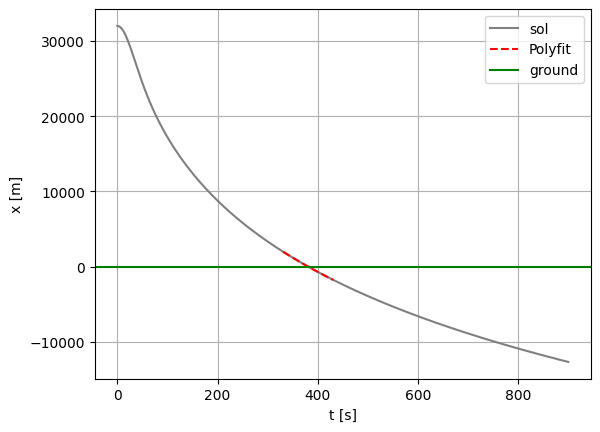

In [ ]:
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(sol.t, sol.y[0], c="gray", label="sol")
plt.plot(tfit, xfit, c='r', label="Polyfit", ls="dashed")
plt.axhline(0, c="green", label="ground")
plt.legend()

In [ ]:
"""
x = 0 일 때 t의 값
"""
tsol = fsolve(pfi, 381)
tsol

array([381.19044097])

In [ ]:
tc = tsol[0]

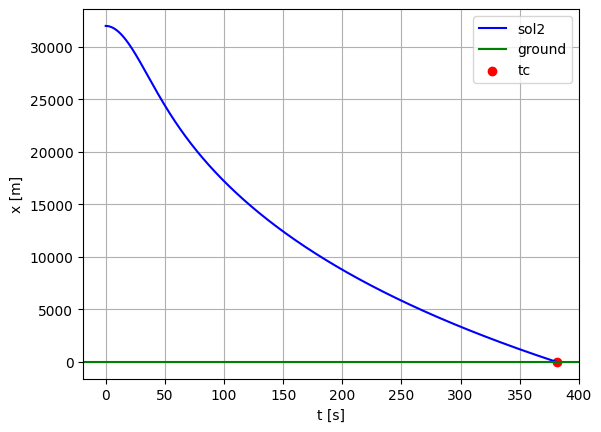

In [ ]:
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(sol.t[:idx+2], sol.y[0, :idx+2], c="blue", label="sol2")
plt.axhline(0, c="green", label="ground")
plt.scatter(tc, 0, c="red", label="tc")
plt.legend()

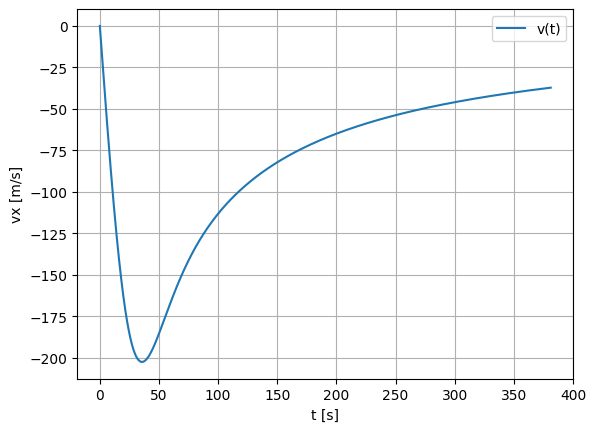

In [ ]:
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("vx [m/s]")
plt.plot(sol.t[:idx+2], sol.y[1, :idx+2], label="v(t)")
plt.legend()

In [ ]:
sol.y[1, idx+1]

-37.2038690923526

In [ ]:
dv = np.diff(sol.y[1])
dt = np.diff(sol.t)
dvdt = dv/dt

In [ ]:
dvdt[0]

-9.702234460806025

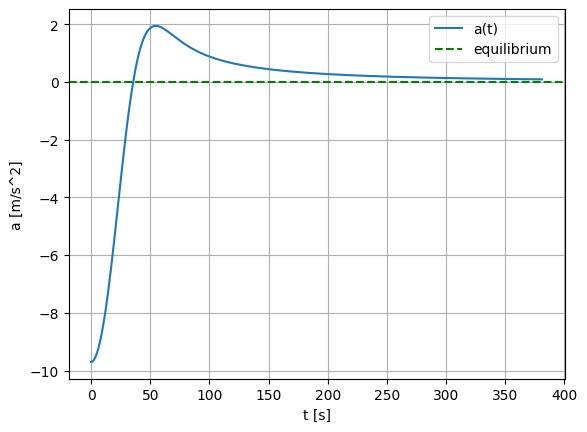

In [ ]:
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("a [m/s^2]")
plt.plot(sol.t[:idx+2], dvdt[:idx+2], label="a(t)")
plt.axhline(0, c="green", ls="dashed", label="equilibrium")
plt.legend()

In [ ]:
# 모델 (a), (b), (c)에서 예상 낙하시간 비교:
ta, tb[0], tc

(80.81220356417685, 866.5386455378431, 381.19044096935926)

In [ ]:
ta < tc < tb[0]

True